# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
today = date.today()

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city +"&units=Metric"
    #response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gamboula
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | aasiaat
Processing Record 4 of Set 1 | princeville
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | byron bay
Processing Record 7 of Set 1 | as sulayyil
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | akureyri
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | san jose de mayo
Processing Record 18 of Set 1 | barra de santo antonio
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | dakhla
Processing Record 21 of Set 1 | kodiak
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gamboula,4.1178,15.1393,21.24,94,100,0.73,CF,1684031848
1,aasiaat,68.7098,-52.8699,-5.15,78,100,1.97,GL,1684031850
2,princeville,45.7668,-61.2985,7.10,83,20,2.06,CA,1684031850
3,ilulissat,69.2167,-51.1000,-1.99,93,100,4.63,GL,1684031850
4,byron bay,-28.6500,153.6167,20.52,78,28,2.45,AU,1684031851


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/ethan/Bootcamp/python-api-challenge/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/ethan/Bootcamp/python-api-challenge/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gamboula,4.1178,15.1393,21.24,94,100,0.73,CF,1684031848
1,aasiaat,68.7098,-52.8699,-5.15,78,100,1.97,GL,1684031850
2,princeville,45.7668,-61.2985,7.10,83,20,2.06,CA,1684031850
3,ilulissat,69.2167,-51.1000,-1.99,93,100,4.63,GL,1684031850
4,byron bay,-28.6500,153.6167,20.52,78,28,2.45,AU,1684031851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

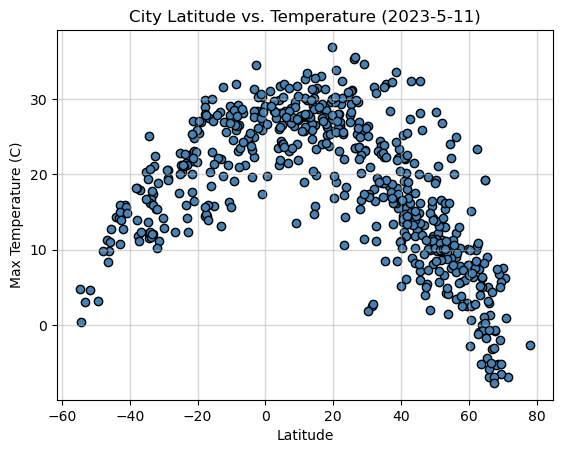

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolor = "steelblue",edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-5-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle = '-',linewidth=1,alpha = 0.5)

# Save the figure
plt.savefig("C:/Users/ethan/Bootcamp/python-api-challenge/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#I know this says city max latitude, just trying to match the given output figure

#### Latitude Vs. Humidity

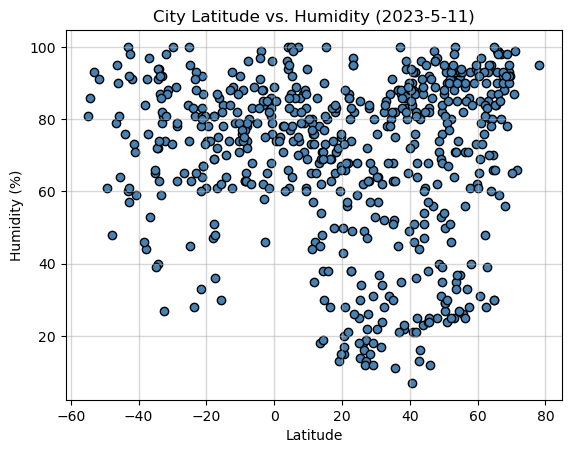

In [28]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],facecolor = "steelblue",edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-5-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = '-',linewidth=1,alpha = 0.5)

# Save the figure
plt.savefig("C:/Users/ethan/Bootcamp/python-api-challenge/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

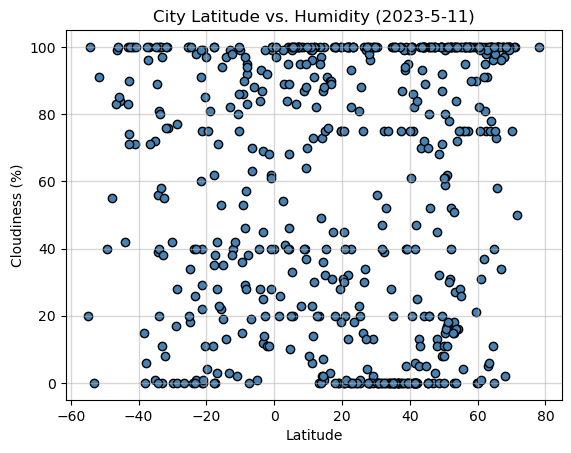

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolor = "steelblue",edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-5-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle = '-',linewidth=1,alpha = 0.5)

# Save the figure
plt.savefig("C:/Users/ethan/Bootcamp/python-api-challenge/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

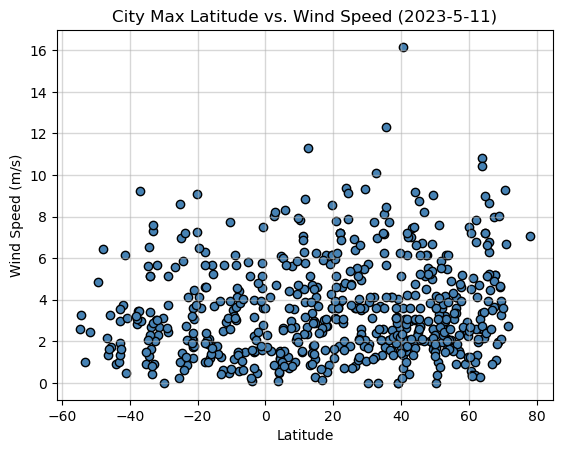

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolor = "steelblue",edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-5-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle = '-',linewidth=1,alpha = 0.5)

# Save the figure
plt.savefig("C:/Users/ethan/Bootcamp/python-api-challenge/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression_plot(x,y,a,b):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    line = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,x*slope+intercept,"r-")
    plt.annotate(line,(a,b),fontsize=15,color="red")
    print("The r-value is: " + str(rvalue))


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gamboula,4.1178,15.1393,21.24,94,100,0.73,CF,1684031848
1,aasiaat,68.7098,-52.8699,-5.15,78,100,1.97,GL,1684031850
2,princeville,45.7668,-61.2985,7.10,83,20,2.06,CA,1684031850
3,ilulissat,69.2167,-51.1000,-1.99,93,100,4.63,GL,1684031850
5,as sulayyil,20.4607,45.5779,27.14,20,0,3.14,SA,1684031851


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,byron bay,-28.6500,153.6167,20.52,78,28,2.45,AU,1684031851
7,waitangi,-43.9535,-176.5597,14.34,76,42,0.89,NZ,1684031852
10,hermanus,-34.4187,19.2345,11.56,72,56,6.55,ZA,1684031852
13,ushuaia,-54.8000,-68.3000,4.81,81,20,2.57,AR,1684031853
15,san jose de mayo,-34.3375,-56.7136,12.13,91,39,2.10,UY,1684031853


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8100891692239303


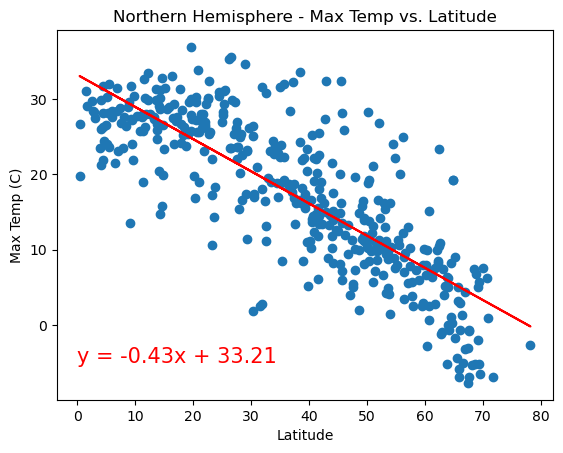

In [30]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],0,-5)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.show()


The r-value is: 0.7949533722990418


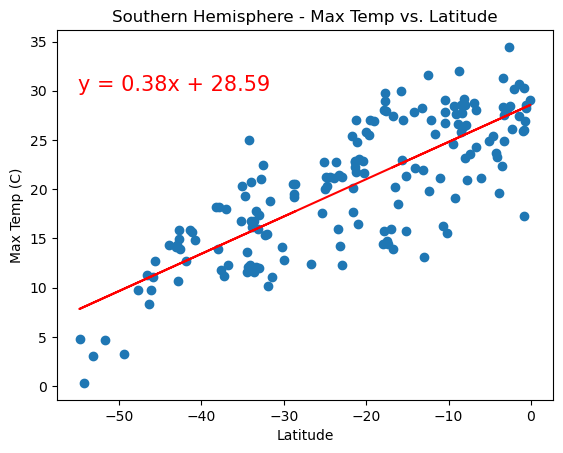

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],-55,30)
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11475812073652385


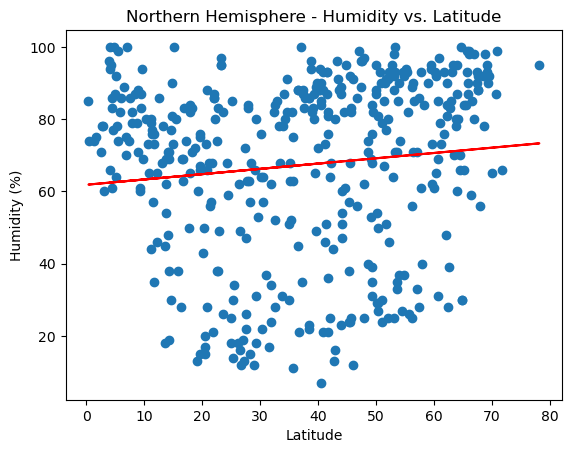

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],10,-10)
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()


The r-value is: 0.022570042730276605


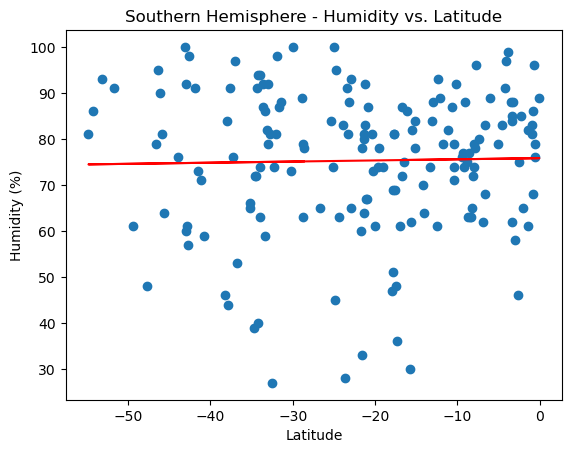

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],0,-10)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1346390535559733


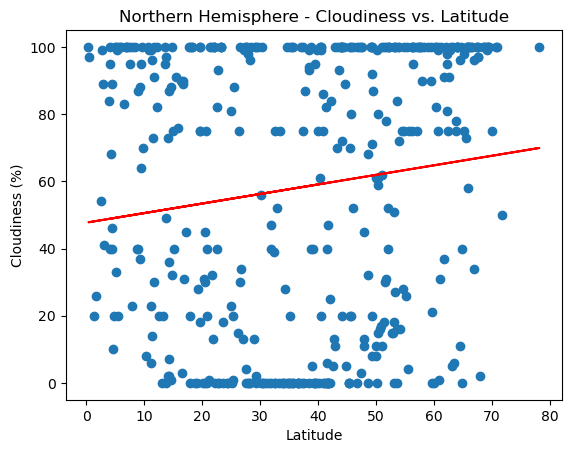

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],10,-10)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: -0.10454217238585913


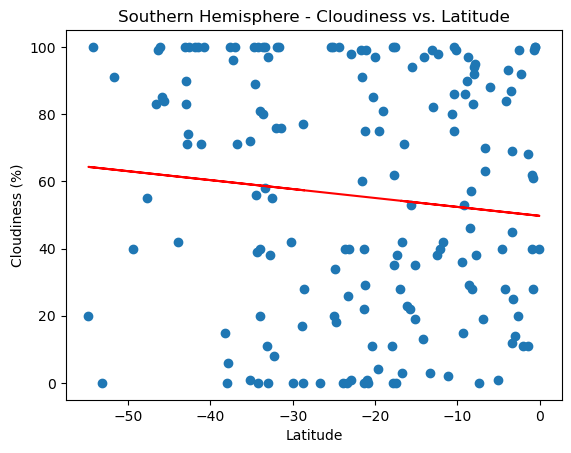

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],10,-10)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05340822198396166


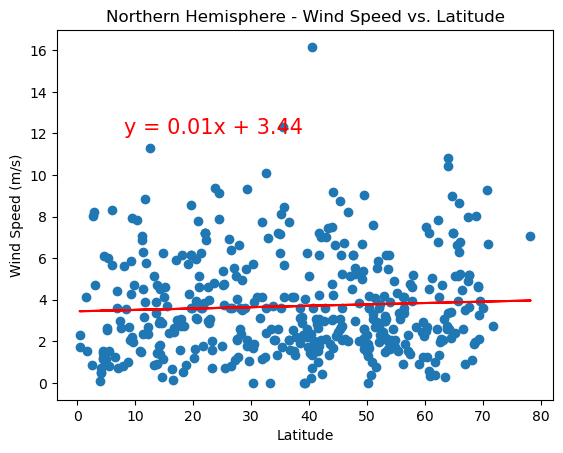

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],8,12)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: 0.003353798663378064


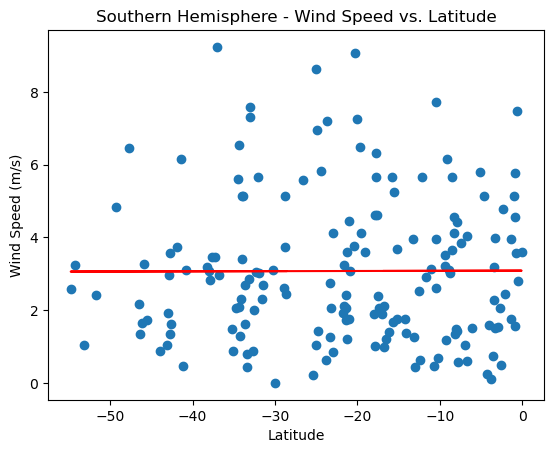

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-50,15)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
#  In terms of regressions done here, the best results are from Max temperature vs. Latitude (r = -0.83, 0.74). 
#  Which makes sense due to where solar radiation is focused on the earth.
#  Wind speed vs. Latitude, Humidity vs. Latitude, and Cloudiness vs. Latitude all display a lack of correlation at all (r < 0.2)
#  Which makes sense as those metrics are based on non-static gradients that exist in our atmosphere (o-zone inconsistency, and generalized disorder of water cycling)
#  It would be more useful to perform these regressions based on distance to the nearest body of water.